[532.03633953]
Maximum EQE: 7.06%
Maximum Luminance: 374814.87cd/m2


/var/folders/vl/5k9cn_bd01303bqb1jnhn4d00000gn/T/ipykernel_10437/1131515320.py:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Greens', 8)#('PuBu', 8)
/var/folders/vl/5k9cn_bd01303bqb1jnhn4d00000gn/T/ipykernel_10437/1131515320.py:149: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('PuBu', 8)
/var/folders/vl/5k9cn_bd01303bqb1jnhn4d00000gn/T/ipykernel_10437/1131515320.py:246: RuntimeWarning: invalid value encountered in double_scalars
  power_efficiency_array[i]=emitted_photons_s*K/(voltage*device_current)


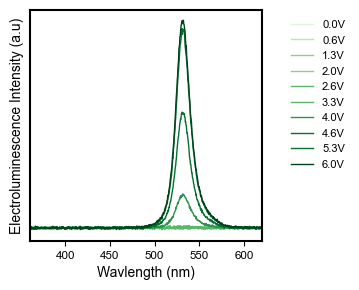

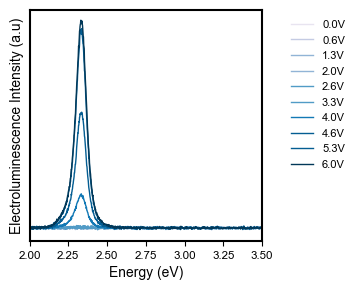

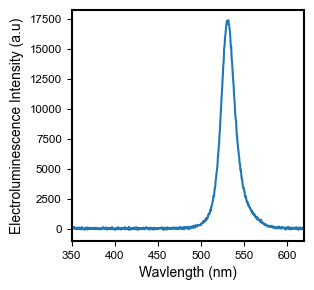

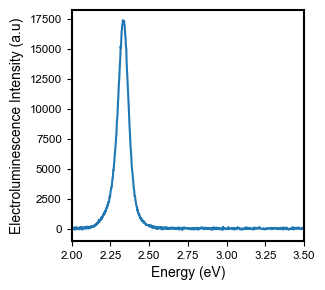

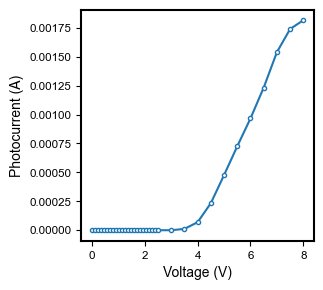

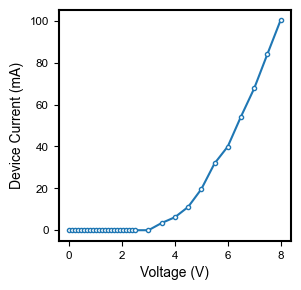

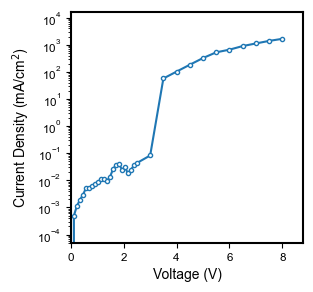

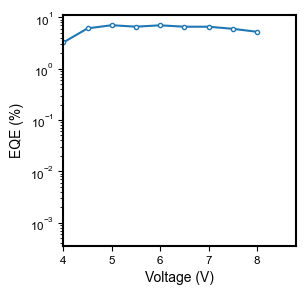

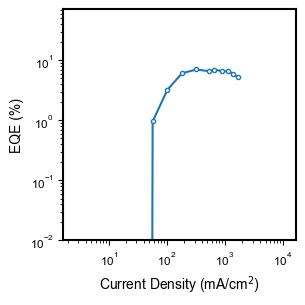

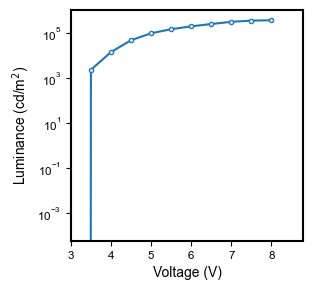

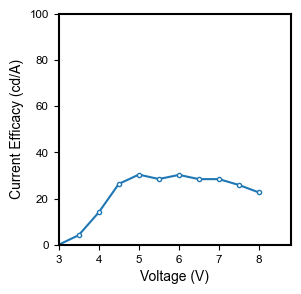

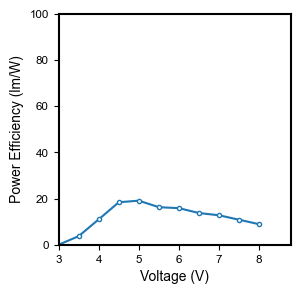

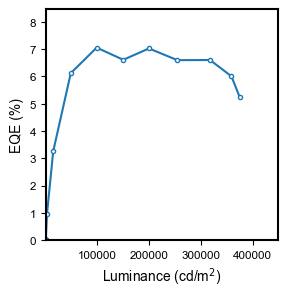

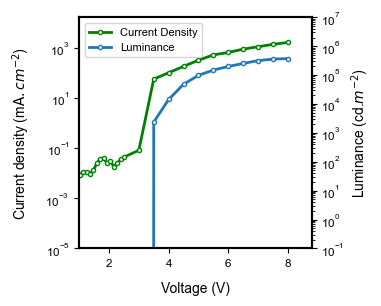

In [42]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 15 19:19:15 2017

@author: mziffer
@adapted by: gillian shen 
#Adapted for normalized spectral distribution inputs, with calculations based on 
Anaya, M. et al. Best practices for measuring emerging light-emitting diode technologies. Nat Photonics 13, 818–821 (2019).
"""

import numpy as np
import matplotlib.cm as cm
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.constants as constants
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc('font', family='Arial')
plt.rcParams['axes.linewidth'] = 1.5
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
plt.rcParams['lines.marker']='o'
plt.rcParams['lines.markersize']= 3
plt.rcParams['font.size'] = 10
plt.rcParams['markers.fillstyle'] = 'full'
plt.rcParams['lines.markerfacecolor'] = 'white'

"""User inputs here"""
device_region = 'B'
jvl_filename = r'../QLED_testing/IV+Spectra2/2024-03-28QD48_t-Bu-2PACz_D3_p3_0.0V-8.0V_IV+photocurrent' #DO NOT ENTER '.txt'
el_spectrum_filename = r'../QLED_testing/IV+Spectra2/2024-02-01QD40_thick_PVK_C4_p7_0.0V-6.0V_0.002s_spectra'
#for paper
#PEDOT 2024-02-01QD40_thick_PVK_C2_p2_-2.0V-7.0V_IV+photocurrent
#PVK 2024-02-01QD40_thick_PVK_C4_p2_-2.0V-6.0V_IV+photocurrent
#PACz 2024-02-23QD44_PACz_1mgmL_B1_p5_-2.0V-7.0V_IV+photocurrent

Background_spectrum_override= False
background_spectrum_filename = r'../QLED_testing/IV+Spectra2/2023-11-02QD33_50Br_NSA_PVK_B1_higherV_blank_spectra'
#2023-07-14ZW_Yunping_A4_unencapsulated_spectra' #DO NOT ENTER '.txt'

#Override EL spectrum with QD PL spectrum (if no EL data available)
Override=False
pl_spectrum = pd.read_csv("../../20230922/QD33_NoNSA#02.sp", skiprows=53, sep='\t').reset_index().to_numpy()
#pd.read_csv("../../20230921/QD32_NoNSA#02.sp", skiprows=53, sep='\t').reset_index().to_numpy()

"""EL spectrum should be in units of photons * s^-1 * nm^-1"""

pixel_area = 0.0605 #in cm^2 #1.08 for full?
#0.0605 #cm2 without mask
# #0.057 #cm2 with mask

"""DO NOT EDIT BELOW"""

e_charge = constants.physical_constants['elementary charge'][0] 
h = constants.physical_constants['Planck constant'][0]
c = (constants.physical_constants['speed of light in vacuum'][0])

el_spec_file = np.loadtxt(el_spectrum_filename + '.csv', delimiter = '\t')
jvl_data = np.loadtxt(jvl_filename + '.csv', delimiter = '\t', skiprows = 1)
el_spectrum_pandas = pd.read_csv(el_spectrum_filename+'.csv', delimiter = '\t')

background_spectrum_file=np.loadtxt(background_spectrum_filename + '.csv', delimiter = '\t')

spectra_volts = list(el_spectrum_pandas.columns)
new_spectra_volts = []
for i in range(len(spectra_volts)):
    result=''
    result = ''.join([j for j in spectra_volts[i][:3] if not j.isalpha()])
    new_spectra_volts.append(result)

el_spec_nm = np.copy(el_spec_file[:,0])
el_spec_background= np.copy(el_spec_file[:,1])

if Background_spectrum_override:
    el_spec_background= np.copy(background_spectrum_file[:,-1])

el_spec_au= np.copy(el_spec_file[:,-1])-el_spec_background
el_spec_norm = el_spec_au/np.amax(el_spec_au)
#el_spec_photons_s =  np.copy(el_spec_file[:,-1])
e_photon = h * c / (el_spec_nm * 1e-9)
e_photon_avg = np.trapz(el_spec_norm*e_photon, x = el_spec_nm)/np.trapz(el_spec_norm, x = el_spec_nm)
#el_spec_w = el_spec_photons_s * e_photon



volts = np.copy(jvl_data[:,0])
pd_current_array = np.copy(jvl_data[:,2]-jvl_data[0,2])/1000 # In units of Amps
device_current_array = np.copy(jvl_data[:,1])/1000 # In units of Amps
max_driving_voltage=np.amax(volts)
max_current_density=np.amax(device_current_array)*1000/pixel_area

if Override:
    el_spec_nm = np.copy(pl_spectrum[:,0])
    el_spec_au = np.copy(pl_spectrum[:,1])
    el_spec_norm = el_spec_au/np.amax(el_spec_au)
    #el_spec_photons_s =  np.copy(el_spec_file[:,-1])
    e_photon = h * c / (el_spec_nm * 1e-9)
    e_photon_avg = np.trapz(el_spec_norm*e_photon, x = el_spec_nm)/np.trapz(el_spec_norm, x = el_spec_nm)
    
    eVs = [] #np.zeros((len(el_spec_nm)))
    for i in el_spec_nm:
        e=(h*c/(i*1e-9))/e_charge
        eVs.append(e)

else:
    
    #EL peak-finding:
    #define wavelength range for search for max
    nm_min=300
    nm_max=800
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]
    index_min=find_nearest(el_spec_nm, nm_min)
    index_max=find_nearest(el_spec_nm, nm_max)
    np.amax(el_spec_au[int(index_min):int(index_max)])
    max=np.where(el_spec_au[:]==np.amax(el_spec_au[int(index_min):int(index_max)]))
    #print("Peak wavelength: "+ '%.2f'%el_spec_nm[max].item()+"nm")
    print(el_spec_nm[max])
    #el_intensity_max=el_spec_au[max].any()

    eVs = []
    for i in el_spec_nm:
        e=(h*c/(i*1e-9))/e_charge
        eVs.append(e)
        
    colors = cm.get_cmap('Greens', 8)#('PuBu', 8)
    plt.figure(figsize=(3,3))
    plt.xlabel('Wavlength (nm)')
    plt.ylabel('Electroluminescence Intensity (a.u)')
    #for k in range(int(3*(len(el_spec_file[0])-1)/4),len(el_spec_file[0])-1):
    for k in range(len(el_spec_file[0])-1):
        plt.plot(el_spec_file[:,0],el_spec_file[:,k+1]-el_spec_background,color = colors((k+3)/(len(el_spec_file[0])+2)),
                 label=f'{new_spectra_volts[k+1]}V', linewidth = 1, marker='') #
        #color = colors(4*(k-int(3*(len(el_spec_file[0])-1)/4))/len(el_spec_file[0]))
        #plt.plot(eVs,el_spec_file[:,k+1]-el_spec_file[:,1],color = colors(4*(k-int(3*(len(el_spec_file[0])-1)/4))/len(el_spec_file[0])), 
                # label=f'{new_spectra_volts[k+1]}V', linewidth = 1)
    plt.xlim(360,620)
    #plt.ylim(0,25000)
    #plt.ylim(0,el_intensity_max*5)
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.4, 1), loc=1, frameon=False, fontsize=8, ncol=1)

    colors = cm.get_cmap('PuBu', 8)
    plt.figure(figsize=(3,3))
    plt.xlabel('Energy (eV)')
    plt.ylabel('Electroluminescence Intensity (a.u)')
    for k in range(len(el_spec_file[0])-1):
    #for k in range(int(3*(len(el_spec_file[0])-1)/4),len(el_spec_file[0])-1):
        plt.plot(eVs,el_spec_file[:,k+1]-el_spec_background,color =colors((k+3)/(len(el_spec_file[0])+2)),
            label=f'{new_spectra_volts[k+1]}V', linewidth = 1, marker = '')#colors(4*(k-int(3*(len(el_spec_file[0])-1)/4))/len(el_spec_file[0])), 
        #colors(4*(k-int(3*(len(el_spec_file[0])-1)/4))/len(el_spec_file[0])),
    plt.xlim(2,3.5)
    #plt.ylim(0,25000)
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.4, 1), loc=1, frameon=False, fontsize=8, ncol=1)


'''eVs = [] #np.zeros((len(el_spec_nm)))
for i in el_spec_nm:
    e=(h*c/(i*1e-9))/e_charge
    eVs.append(e)'''
    
plt.figure(figsize=(3,3))
plt.plot(el_spec_nm, el_spec_au,marker='')
plt.xlabel('Wavlength (nm)')
plt.ylabel('Electroluminescence Intensity (a.u)')
plt.xlim(350,620)
#plt.ylim(0,el_intensity_max*1.5)
#plt.ylim(-500,1500)
#plt.title('Selected EL Spectrum')

plt.figure(figsize=(3,3))
plt.plot(eVs, el_spec_au,marker='')
plt.xlabel('Energy (eV)')
plt.ylabel('Electroluminescence Intensity (a.u)')
plt.xlim(2,3.5)
#plt.ylim(0,el_intensity_max*1.5)
#plt.ylim(-500,1500)
#plt.title('Selected EL Spectrum')

pd_responsivity_file = np.loadtxt(r'../QLED_testing/Si_Diode_MZ_000.txt', delimiter = '\t',skiprows=1)
pd_resp_nm = np.copy(pd_responsivity_file[:,0])
pd_resp = np.copy(pd_responsivity_file[:,3])
pd_eqe = np.copy(pd_responsivity_file[:,2])

pd_resp_interp = np.interp(el_spec_nm, pd_resp_nm, pd_resp)
pd_eqe_interp = np.interp(el_spec_nm, pd_resp_nm, pd_eqe)/100

plt.figure(figsize=(3,3))
#plt.ylim(1e-12, 1e-10)
#plt.xlim(0.0, 1.2)
plt.plot(volts, pd_current_array)
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (A)')

plt.figure(figsize=(3,3))
#plt.xlim(0.0, 1.2)
plt.plot(volts, device_current_array*1000)
plt.xlabel('Voltage (V)')
plt.ylabel('Device Current (mA)')

plt.figure(figsize=(3,3))
plt.xlim(0.0, max_driving_voltage*1.1)
plt.ylim(0.00005,10*max_current_density)
plt.semilogy(volts, device_current_array*1000/pixel_area)
plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/cm$^2$)')

if jvl_filename.find('p4')!=-1 or jvl_filename.find('p8')!=-1:
    Throughput = 0.9
else:
    Throughput = 0.97

phototopic = pd.read_csv('../QLED_testing/StranksPhototopicLuminosityFunction.csv',header=None).to_numpy()
phototopic_scaling = 683.002 #lm·W-1
phototopic_nm=phototopic[:,0]
phototopic_factor=phototopic[:,1]*phototopic_scaling
phototopic_interp = np.interp(el_spec_nm, phototopic_nm, phototopic_factor)
    
elqe_array = np.empty_like(volts)
luminous_intensity_array = np.empty_like(volts) 
luminance_array = np.empty_like(volts)
current_efficacy_array= np.empty_like(volts)
luminous_efficacy_array= np.empty_like(volts)
power_efficiency_array = np.empty_like(volts)
ELmax_array = np.empty_like(volts)
C=np.trapz(pd_resp_interp * el_spec_norm, x = el_spec_nm)/np.trapz(el_spec_norm, x = el_spec_nm)
K = np.trapz(phototopic_interp*el_spec_norm*h*c/(el_spec_nm * 1e-9), x = el_spec_nm)/np.trapz(el_spec_norm, x = el_spec_nm)    
for i in range(len(volts)):
    pd_current = pd_current_array[i]
    voltage = volts[i]
    device_current = device_current_array[i]
    emitted_photons_s = pd_current/(Throughput*e_charge*C) #phi == photon flux in forward hemisphere
    injected_charge_s = device_current / e_charge
    elqe_array[i] = emitted_photons_s / injected_charge_s
    phi_phd = emitted_photons_s/math.pi
    luminous_intensity_array[i]=phi_phd*K
    luminance_array[i]=phi_phd*K/(pixel_area*1e-4)
    current_efficacy_array[i] = phi_phd*K/device_current
    power_efficiency_array[i]=emitted_photons_s*K/(voltage*device_current)
    '''max=np.where(el_spec_file[:,i+1]==np.amax(el_spec_file[:,i+1]))
    ELmax_array[i]=el_spec_nm[max].item()'''#uncomment this part typically, only comment when numpoints is different between spectral and EL files

    #luminous_efficacy_array[i]=emitted_photons_s*K/(pd_current*voltage)
    #el_spec_scale_factor = pd_current / np.trapz(pd_resp_interp * el_spec_w, x = el_spec_nm)
    #el_spec_w_corrected = el_spec_scale_factor * el_spec_w
    #el_spec_photons_s_corrected = el_spec_w_corrected / e_photon
    #emitted_w = np.trapz(el_spec_scale_factor * el_spec_photons_s, x  = el_spec_nm)

#EQE peak-finding
V_min = 3.0
V_min_actual= find_nearest(volts, V_min)
V_index_min =np.where(volts==V_min_actual)[0].item()
print("Maximum EQE: "+'%.2f'%(100*np.amax(elqe_array[V_index_min:]))+"%")

#Luminance peak-finding
print("Maximum Luminance: "+'%.2f'% np.amax(luminance_array[:])+"cd/m2")

plt.figure(figsize=(3,3))
plt.xlabel('Voltage (V)')
plt.ylabel('EQE (%)')
plt.xlim(4,max_driving_voltage*1.1)
plt.semilogy(volts, elqe_array*100)

plt.figure(figsize=(3,3))
plt.xlabel('Current Density (mA/cm$^2$)')
plt.ylabel('EQE (%)')
plt.xlim(max_current_density/1000,10*max_current_density)
plt.ylim(1e-2,np.amax(elqe_array[V_index_min:])*1000)
plt.yscale('log')
plt.semilogx(device_current_array*1000/pixel_area, elqe_array*100)

plt.figure(figsize=(3,3))
plt.xlabel('Voltage (V)')
plt.ylabel('Luminance (cd/m$^2$)')
plt.xlim(3,max_driving_voltage*1.1)
plt.semilogy(volts, luminance_array)

plt.figure(figsize=(3,3))
plt.xlabel('Voltage (V)')
plt.ylabel('Current Efficacy (cd/A)')
plt.ylim(0,100)
plt.xlim(3,max_driving_voltage*1.1)
plt.plot(volts, current_efficacy_array)
#plt.semilogy(volts, current_efficacy_array)

plt.figure(figsize=(3,3))
plt.xlabel('Voltage (V)')
plt.ylabel('Power Efficiency (lm/W)')
plt.ylim(0,100)
plt.xlim(3,max_driving_voltage*1.1)
plt.plot(volts, power_efficiency_array)
#plt.semilogy(volts, current_efficacy_array)


plt.figure(figsize=(3,3))
plt.xlabel('Luminance (cd/m$^2$)')
plt.ylabel('EQE (%)')
plt.xlim(0.1,1.2*np.amax(luminance_array[:]))
plt.ylim(0,np.amax(elqe_array[V_index_min:])*100*1.2)
plt.plot(luminance_array,elqe_array*100)

fig, ax1 = plt.subplots(figsize=(3, 3))
ax2 = ax1.twinx()
line1, = ax1.plot(volts,device_current_array*1000/pixel_area,linewidth=2, color ='green', label = 'Current Density')
line2, = ax2.plot(volts,luminance_array,linewidth=2, label = 'Luminance')
ax1.legend(handles=[line1, line2], fontsize = 8,)
ax1.set_xlabel(r'Voltage (V)', labelpad=10,fontsize = 10)
ax1.set_ylabel('Current density (mA$.cm^{-2}$)', labelpad=10,fontsize = 10)
#ax1.set_title(f'JVL curve \nfor {Sample_Name}', fontsize = 14)
ax2.set_ylabel('Luminance (cd.$m^{-2}$)',fontsize = 10)
ax1.set_xlim(1,max_driving_voltage*1.1)
ax1.set_ylim(1e-5,10*max_current_density)
ax2.set_ylim(1e-1,1e7)
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show() 
    
out = np.empty((len(elqe_array), 9))
out[:,0] = volts #units [V]
out[:,1] = device_current_array #units [A]
out[:,2] = pd_current_array #units [A]
out[:,3] = device_current_array*1000/pixel_area #[mA/cm^2]
out[:,4] = elqe_array*100 #[%]
out[:,5] = luminance_array #[cd/m^2]
out[:,6] = ELmax_array #nm
out[:,7] = current_efficacy_array #cd/A
out[:,8] = power_efficiency_array #lm/W
   
np.savetxt(jvl_filename + '_device_characteristics.txt', out, delimiter = '\t', fmt = '%.8e',
           header="Volts[V]\tDeviceCurrent[A]\tPhotodiodeCurrent[A]\tDeviceCurrentDensity[mA/cm^2]\tEQE[%]\tLuminance[cd/m^2],EL peak(nm)",)

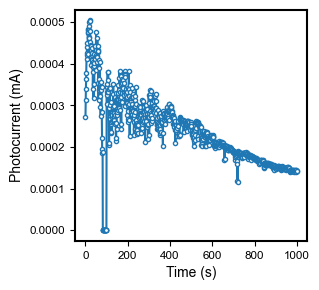

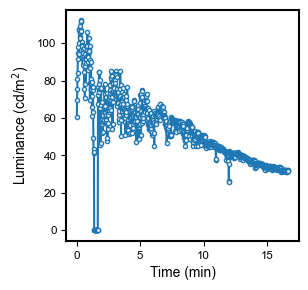

In [14]:
#Now Processing Device Luminance Decay Over Time 
el_decay_filename = "../QLED_testing/IV+Spectra2/2024-04-04t-Bu2PACz_B6_p4_1000s_EL_time_IV_1mA"
el_decay_file = np.loadtxt(el_decay_filename + '.csv', delimiter = '\t')

if el_decay_filename.find('p4')!=-1 or jvl_filename.find('p8')!=-1:
    Throughput = 0.9
else:
    Throughput = 0.97

time = list(el_decay_file[:,0])
decay_pd_current_array = el_decay_file[:,3]/1000
decay_luminance_array = np.empty_like(time)

for i in range(len(time)):
    pd_current = decay_pd_current_array[i]
    emitted_photons_s = pd_current/(Throughput*e_charge*C) #phi == photon flux in forward hemisphere
    phi_phd = emitted_photons_s/math.pi
    decay_luminance_array[i]=phi_phd*K/(pixel_area*1e-4)

plt.figure(figsize=(3,3))
plt.plot(el_decay_file[:,0],el_decay_file[:,3])
plt.xlabel('Time (s)')
plt.ylabel('Photocurrent (mA)')
plt.show()

plt.figure(figsize=(3,3))
plt.plot(el_decay_file[:,0]/60,decay_luminance_array)
plt.xlabel('Time (min)')
plt.ylabel('Luminance (cd/m$^2$)')
plt.show()

out = np.empty((len(time), 3))
out[:,0] = time #units [s]
out[:,1] = el_decay_file[:,3] #units [mA]
out[:,2] = decay_luminance_array #units [Cd/m^2]
   
np.savetxt(el_decay_filename + '_luminance.txt', out, delimiter = '\t', fmt = '%.8e',
           header="time[s]\tPhotocurrent[mA]\tLuminance[cd/m^2]")

In [131]:
#finding the FWHM of the emission spectrum
def calculate_fwhm(wavelengths, intensities):
    # Find the maximum intensity and its corresponding wavelength
    max_intensity = np.max(intensities)
    max_intensity_index = np.argmax(intensities)
    max_intensity_wavelength = wavelengths[max_intensity_index]

    # Determine the half-maximum intensity
    half_max_intensity = max_intensity / 2

    # Find wavelengths where intensity falls below half-maximum on both sides of the peak
    left_index = np.where(intensities[:max_intensity_index] < half_max_intensity)[0][-1]
    right_index = np.where(intensities[max_intensity_index:] < half_max_intensity)[0][0] + max_intensity_index

    # Interpolate to find the wavelengths corresponding to half-maximum intensity
    left_wavelength = np.interp(half_max_intensity, intensities[left_index:left_index+2], wavelengths[left_index:left_index+2])
    right_wavelength = np.interp(half_max_intensity, intensities[right_index:right_index+2], wavelengths[right_index:right_index+2])

    # Calculate FWHM
    fwhm = right_wavelength - left_wavelength

    return fwhm

fwhm = calculate_fwhm(el_spec_nm, el_spec_au)
print("FWHM:", fwhm)


FWHM: 19.2634837504


In [111]:
import numpy as np
from scipy.interpolate import interp1d
from colour import SpectralDistribution, sd_to_XYZ, XYZ_to_xy

spectrum = dict(zip(el_spec_nm, el_spec_au)) 

def interpolate_spectrum(spectrum):
    # Extract wavelengths and values from the provided spectrum
    wavelengths = np.array(list(spectrum.keys()))
    values = np.array(list(spectrum.values()))

    # Create an interpolation function
    interp_func = interp1d(wavelengths, values, kind='linear', fill_value='extrapolate')

    # Define the new wavelength range with intervals of 1 nm between the first column values
    new_wavelengths = np.arange(int(np.min(wavelengths)), int(np.max(wavelengths) + 1))

    # Interpolate the spectrum to the new wavelength range
    interpolated_values = interp_func(new_wavelengths)

    return dict(zip(new_wavelengths, interpolated_values))

def spectrum_to_chromaticity(spectrum):
    
    interpolated_spectrum = interpolate_spectrum(spectrum)
    # Create a spectral distribution from the given spectrum
    sd = SpectralDistribution(interpolated_spectrum)

    # Convert spectral distribution to XYZ tristimulus values
    XYZ = sd_to_XYZ(sd)

    # Convert XYZ tristimulus values to CIE xy chromaticity coordinates
    xy = XYZ_to_xy(XYZ)

    return xy

# Example usage:


# Convert spectrum to chromaticity coordinates
chromaticity_coordinates = spectrum_to_chromaticity(spectrum)

print("CIE Chromaticity Coordinates (x, y):", chromaticity_coordinates)

CIE Chromaticity Coordinates (x, y): [ 0.1987806   0.75886841]


/Users/gillianshen/Library/Python/3.9/lib/python/site-packages/colour/utilities/verbose.py:265: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/Users/gillianshen/Library/Python/3.9/lib/python/site-packages/colour/utilities/verbose.py:265: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/var/folders/vl/5k9cn_bd01303bqb1jnhn4d00000gn/T/ipykernel_97511/2438085802.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([adobe_rgb_red_primary_xy[0], adobe_rgb_green_primary_xy[0], adobe_rgb_blue_primary_xy[0], adobe_rgb_red_primary_xy[0]],


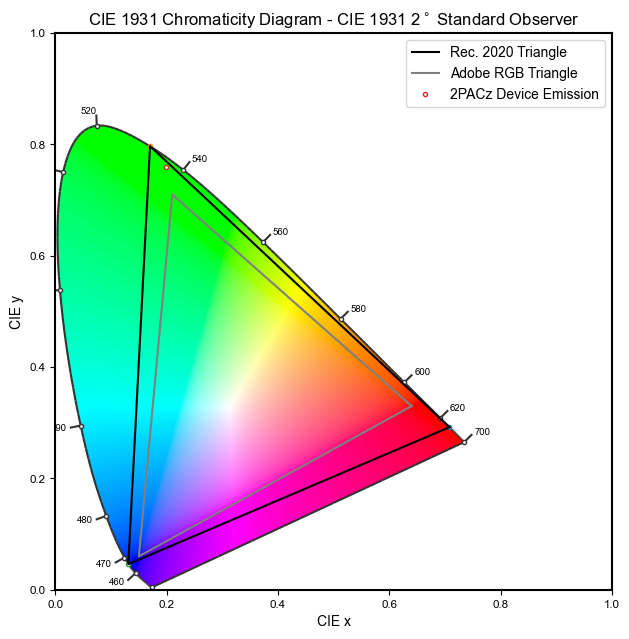

In [130]:
import numpy as np
from scipy.interpolate import interp1d
from colour import SpectralDistribution, sd_to_XYZ, XYZ_to_xy
from colour.plotting import plot_chromaticity_diagram_CIE1931


# Get the Rec. 2020 chromaticity coordinates
rec2020_whitepoint_xy = (0.3127, 0.3290)
rec2020_red_primary_xy = (0.708, 0.292)
rec2020_green_primary_xy = (0.170, 0.797)
rec2020_blue_primary_xy = (0.131, 0.046)

# Adobe RGB primaries chromaticity coordinates
adobe_rgb_red_primary_xy = (0.64, 0.33)
adobe_rgb_green_primary_xy = (0.21, 0.71)
adobe_rgb_blue_primary_xy = (0.15, 0.06)

plot_chromaticity_diagram_CIE1931(standalone=False)

# Plot Rec. 2020 primaries
plt.plot(rec2020_red_primary_xy[0], rec2020_red_primary_xy[1])
plt.plot(rec2020_green_primary_xy[0], rec2020_green_primary_xy[1])
plt.plot(rec2020_blue_primary_xy[0], rec2020_blue_primary_xy[1])

# Connect the primaries to form the triangle
plt.plot([rec2020_red_primary_xy[0], rec2020_green_primary_xy[0], rec2020_blue_primary_xy[0], rec2020_red_primary_xy[0]],
         [rec2020_red_primary_xy[1], rec2020_green_primary_xy[1], rec2020_blue_primary_xy[1], rec2020_red_primary_xy[1]],
         'k-', label='Rec. 2020 Triangle')
# Plot Rec. 2020 white point
#plt.plot(rec2020_whitepoint_xy[0], rec2020_whitepoint_xy[1], 'o', label='Rec. 2020 White point')

plt.plot([adobe_rgb_red_primary_xy[0], adobe_rgb_green_primary_xy[0], adobe_rgb_blue_primary_xy[0], adobe_rgb_red_primary_xy[0]],
         [adobe_rgb_red_primary_xy[1], adobe_rgb_green_primary_xy[1], adobe_rgb_blue_primary_xy[1], adobe_rgb_red_primary_xy[1]],
         'k-', label='Adobe RGB Triangle', color = 'grey')

plt.plot(chromaticity_coordinates[0], chromaticity_coordinates[1], 'o', markersize=3, label="2PACz Device Emission")
plt.legend()
plt.show()

In [35]:
spectra_volts = list(el_spectrum_pandas.columns)
new_spectra_volts = []
for i in range(len(spectra_volts)):
    result=''
    result = ''.join([j for j in spectra_volts[i][:3] if not j.isalpha()])
    new_spectra_volts.append(result)
new_spectra_volts



['# ', '5.0', '5.3', '5.6', '6.0', '6.3', '6.6', '7.0', '7.3', '7.6', '8.0']

In [109]:
el_spectrum_filename = r'../QLED_testing/IV+Spectra2/2023-07-27ZW_Yunping_C4_unencapsulated_EtOAcwash20ul_p5.2_spectra' #DO NOT ENTER '.txt'
el_spec_file = pd.read_csv(el_spectrum_filename+'.csv', delimiter = '\t')
list(el_spec_file.columns)

Index(['# Wavelengths(nm)', '-2.0V', '-1.5909090909090908V',
       '-1.1818181818181817V', '-0.7727272727272727V', '-0.36363636363636354V',
       '0.045454545454545414V', '0.4545454545454546V', '0.8636363636363638V',
       '1.272727272727273V', '1.681818181818182V', '2.090909090909091V',
       '2.5V', '2.909090909090909V', '3.3181818181818183V',
       '3.7272727272727275V', '4.136363636363637V', '4.545454545454546V',
       '4.954545454545455V', '5.363636363636364V', '5.772727272727273V',
       '6.181818181818182V', '6.590909090909092V', '7.0V'],
      dtype='object')

In [77]:
'''
plt.figure()
plt.xlabel('Voltage (V)')
plt.ylabel('Luminous Intensity (cd)')
plt.xlim(3,7.5)
plt.semilogy(volts, luminous_intensity_array)

plt.figure()
plt.xlabel('Voltage (V)')
plt.ylabel('Current Efficacy (cdA$^{-1}$)')
#plt.xlim(3,7.5)
plt.plot(volts, current_efficacy_array)

plt.figure()
plt.xlabel('Voltage (V)')
plt.ylabel('Luminous Efficacy (lmW$^{-1}$)')
plt.xlim(0,7.5)
plt.semilogy(volts, luminous_efficacy_array)'''

"\nplt.figure()\nplt.xlabel('Voltage (V)')\nplt.ylabel('Luminous Intensity (cd)')\nplt.xlim(3,7.5)\nplt.semilogy(volts, luminous_intensity_array)\n\nplt.figure()\nplt.xlabel('Voltage (V)')\nplt.ylabel('Current Efficacy (cdA$^{-1}$)')\n#plt.xlim(3,7.5)\nplt.plot(volts, current_efficacy_array)\n\nplt.figure()\nplt.xlabel('Voltage (V)')\nplt.ylabel('Luminous Efficacy (lmW$^{-1}$)')\nplt.xlim(0,7.5)\nplt.semilogy(volts, luminous_efficacy_array)"

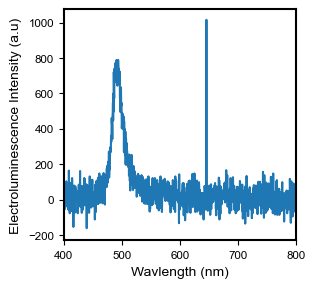

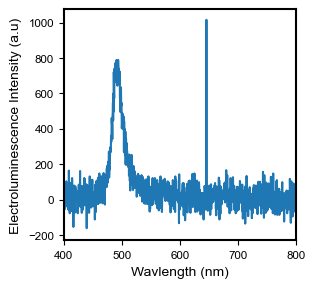

In [9]:
el_spec_au=  np.copy(el_spec_file[:,-1])
el_spec_background= np.copy(el_spec_file[:,1])

plt.figure(figsize=(3,3))
plt.plot(el_spec_nm, el_spec_au-el_spec_background)
plt.xlabel('Wavlength (nm)')
plt.ylabel('Electroluminescence Intensity (a.u)')
plt.xlim(400,800)
plt.show()
#plt.title('Selected EL Spectrum')